# Import Packages

In [1]:
!pip install yfinance    # Install Yahoo Fianace package
import yfinance as yf 
import pandas as pd
from statsmodels.graphics import tsaplots 
import matplotlib.pyplot as plts
import seaborn as sns

# Stock Data Download

In [2]:
def download(stock):  
    """
    Download the stock historical data.

    Parameters
    ----------
    stock: str
      Stock symbol.

    Returns
    -------
    DataFrame
      Downloaded stock historical data.
    """


    df = yf.download(
         [stock],
         start="2017-01-01",
         end="2022-01-01",
         group_by="ticker",
         progress=False)
            
    df = df.round(4)
    df.insert(loc=0, column='Company', value=stock) 
    return df


# Download Apple dataframe
df_AAPL = download('AAPL')  
# Download Amazon dataframe      
df_AMZN = download('AMZN')   
# Download Google dataframe    
df_GOOGL = download('GOOGL')     
# Download Meta dataframe 
df_FB = download('META')    
# Download Microsoft dataframe        
df_MSFT = download('MSFT')       

stock_list={'Apple': df_AAPL, 'Amazon': df_AMZN, 'Google': df_GOOGL, 'Meta': df_FB, 'Microsoft': df_MSFT}

# Data Summary

In [3]:
def info(stock, df):
    """
    Print the summary information of each stock.

    Parameters
    ----------
    stock: str
      Stock company name.
    df: DataFrame
      Stock's dataframe.

    Returns
    -------
    None.
    """

    print(f'{stock}\'s Historical Data: \n\n {df} \n\n')
    print(f'{stock}\'s Column Information: \n')
    print(df.info(),'\n\n')
    print(f'{stock}\'s Statistic Summary: \n\n {df.describe().round(4)}')
    print('-'*75)
    print()


print(info('Apple', df_AAPL))
print(info('Amazon', df_AMZN))
print(info('Google', df_GOOGL))
print(info('Meta', df_FB))
print(info('Microsoft', df_MSFT))

Apple's Historical Data: 

            Company      Open      High       Low     Close  Adj Close  \
Date                                                                    
2017-01-03    AAPL   28.9500   29.0825   28.6900   29.0375    27.1748   
2017-01-04    AAPL   28.9625   29.1275   28.9375   29.0050    27.1443   
2017-01-05    AAPL   28.9800   29.2150   28.9525   29.1525    27.2824   
2017-01-06    AAPL   29.1950   29.5400   29.1175   29.4775    27.5865   
2017-01-09    AAPL   29.4875   29.8575   29.4850   29.7475    27.8392   
...            ...       ...       ...       ...       ...        ...   
2021-12-27    AAPL  177.0900  180.4200  177.0700  180.3300   179.2894   
2021-12-28    AAPL  180.1600  181.3300  178.5300  179.2900   178.2554   
2021-12-29    AAPL  179.3300  180.6300  178.1400  179.3800   178.3449   
2021-12-30    AAPL  179.4700  180.5700  178.0900  178.2000   177.1717   
2021-12-31    AAPL  178.0900  179.2300  177.2600  177.5700   176.5454   

               Volume 

# Stock Price Line Chart

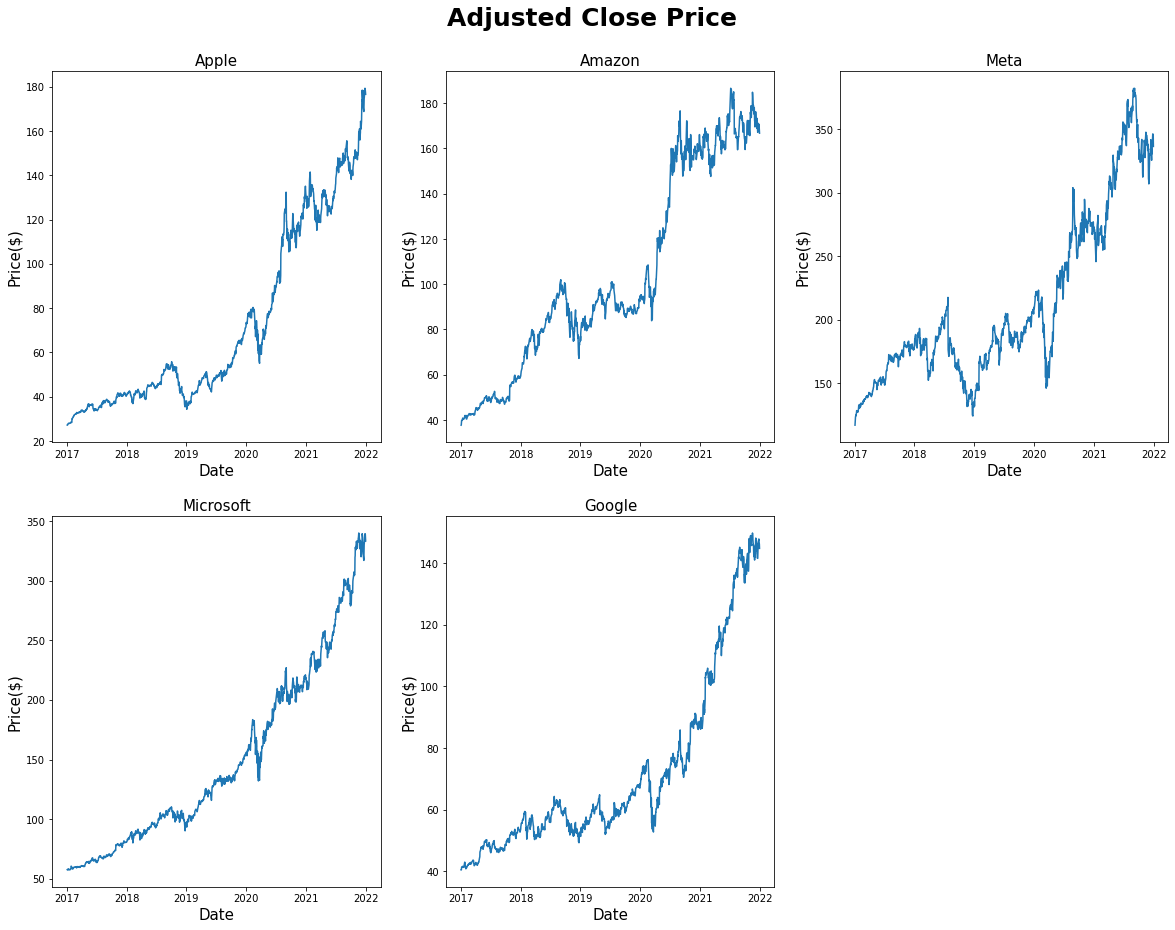

In [4]:
fig, ax = plt.subplots(2,3,figsize=(20,15))
fig.delaxes(ax[1,2])
fontsize = 15

# Apple
ax[0,0].plot(df_AAPL['Adj Close'])
ax[0,0].set_title('Apple', fontsize=fontsize)
ax[0,0].set_xlabel('Date', fontsize=fontsize)
ax[0,0].set_ylabel('Price($)', fontsize=fontsize)

# Amazon
ax[0,1].plot(df_AMZN['Adj Close'])
ax[0,1].set_title('Amazon', fontsize=fontsize)
ax[0,1].set_xlabel('Date', fontsize=fontsize)
ax[0,1].set_ylabel('Price($)', fontsize=fontsize)

# Meta
ax[0,2].plot(df_FB['Adj Close'])
ax[0,2].set_title('Meta', fontsize=fontsize)
ax[0,2].set_xlabel('Date', fontsize=fontsize)
ax[0,2].set_ylabel('Price($)', fontsize=fontsize)

# Microsoft
ax[1,0].plot(df_MSFT['Adj Close'])
ax[1,0].set_title('Microsoft', fontsize=fontsize)
ax[1,0].set_xlabel('Date', fontsize=fontsize)
ax[1,0].set_ylabel('Price($)', fontsize=fontsize)

# Google
ax[1,1].plot(df_GOOGL['Adj Close'])
ax[1,1].set_title('Google', fontsize=fontsize)
ax[1,1].set_xlabel('Date', fontsize=fontsize)
ax[1,1].set_ylabel('Price($)', fontsize=fontsize)

plt.suptitle('Adjusted Close Price', fontsize=25, fontweight='bold', x=0.5, y=0.94)
plt.show()

# Boxplot

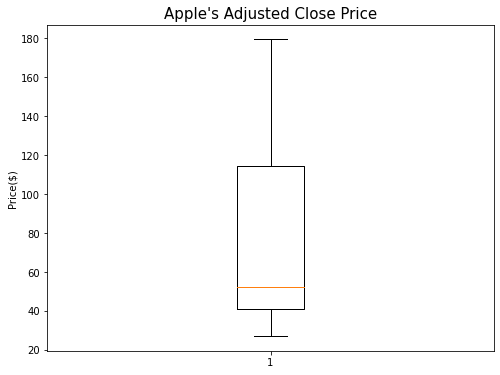

None 



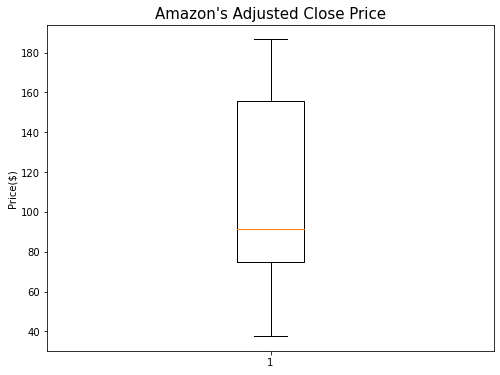

None 



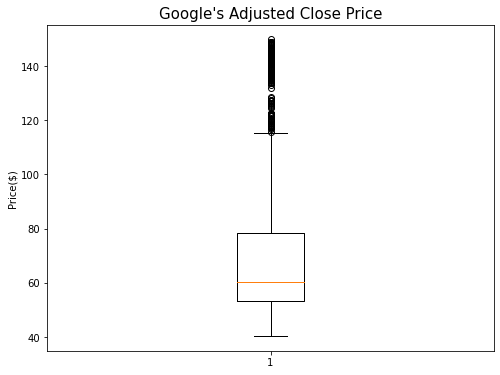

None 



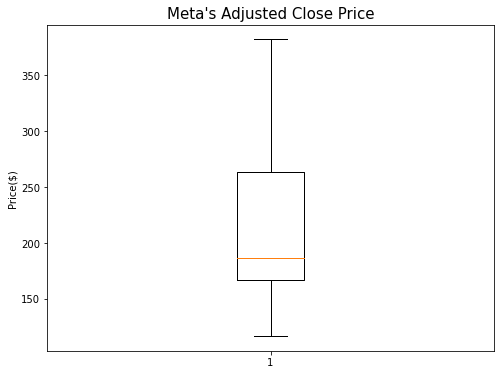

None 



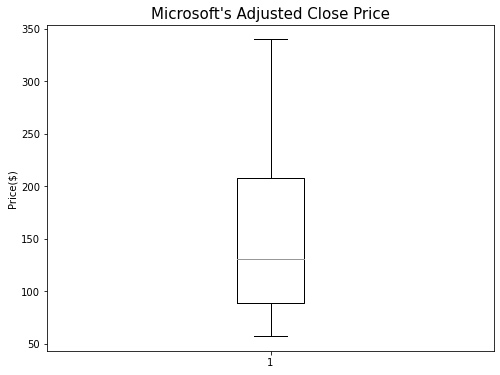

None 



In [5]:
def boxplot(stock, company):
    """
    Plot the boxplot of adjusted close price.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None.
    """

    plt.figure(figsize=(8,6))
    plt.boxplot(stock['Adj Close'])
    plt.ylabel('Price($)')
    plt.title(f'{company}\'s Adjusted Close Price', fontsize=15)
    plt.show()
  
  
for company, stock in stock_list.items():
    print(boxplot(stock, company),'\n')

# Scatter Matrix

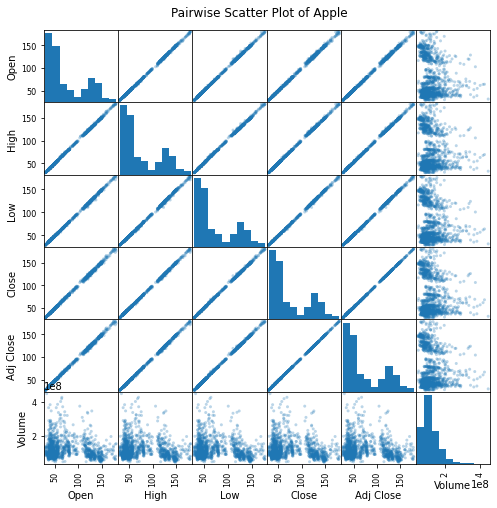

None 



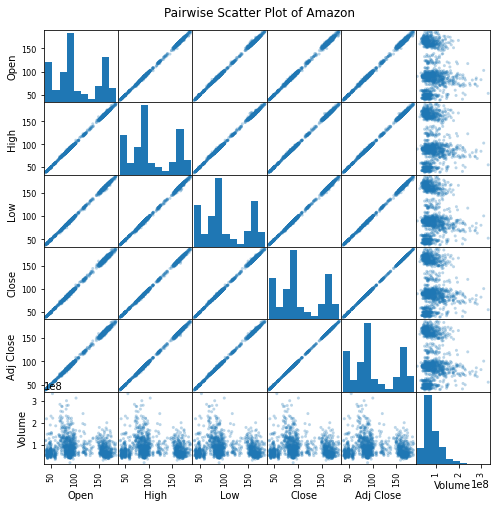

None 



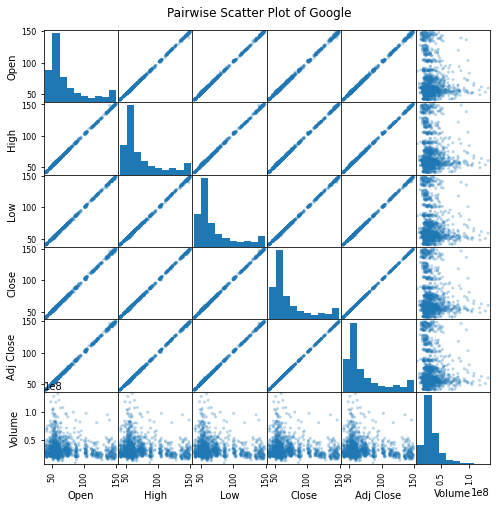

None 



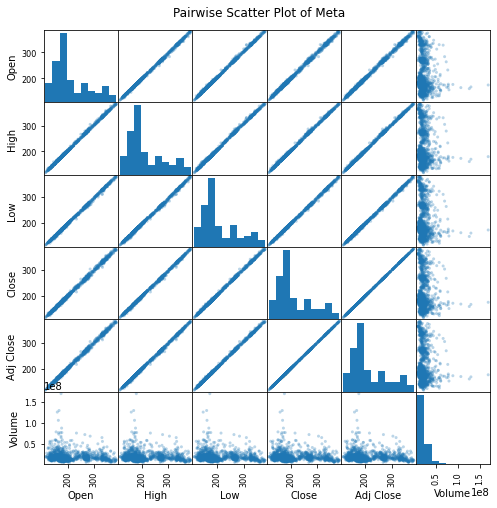

None 



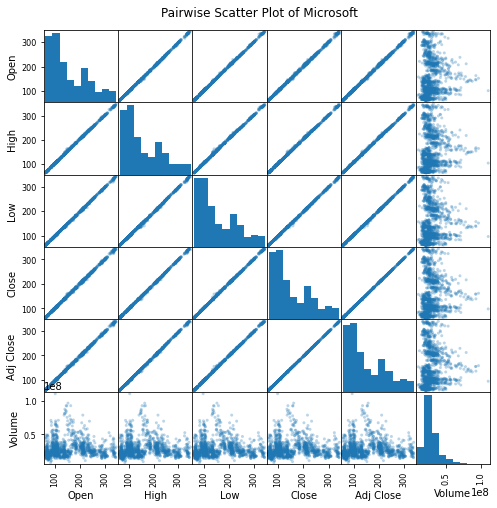

None 



In [6]:
def scatter_matrix(stock, company):
    """
    Plot the scatter matrix.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.
  
    Returns
    -------
    None.
    """

    pd.plotting.scatter_matrix(stock, figsize=(8,8), alpha=0.3)
    plt.suptitle(f'Pairwise Scatter Plot of {company}', x=0.5, y=0.92)
    plt.show()


for company, stock in stock_list.items():
    print(scatter_matrix(stock, company),'\n')

# Heatmap

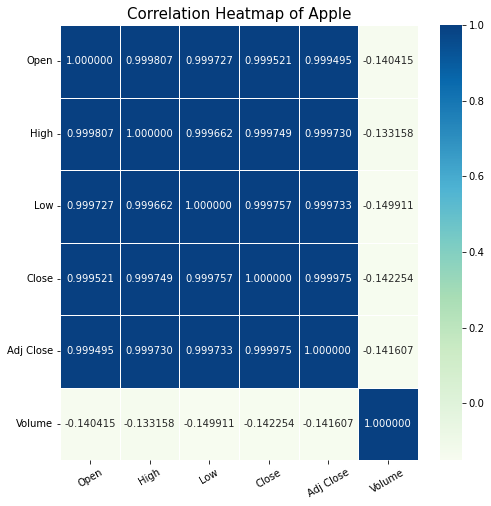

None 



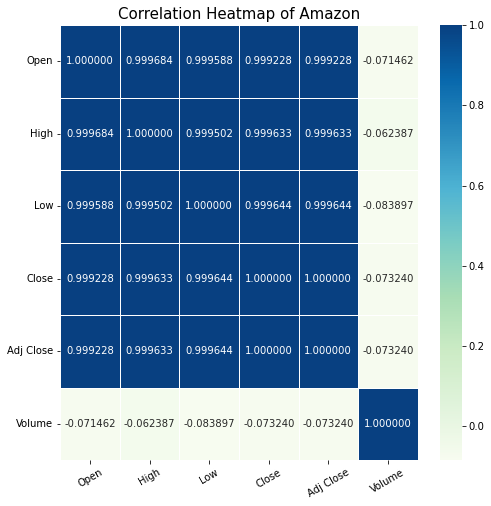

None 



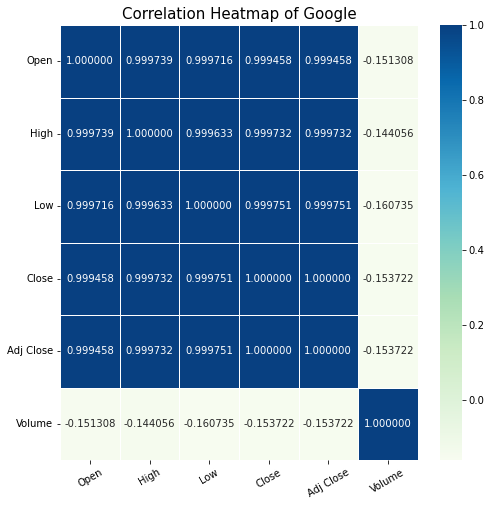

None 



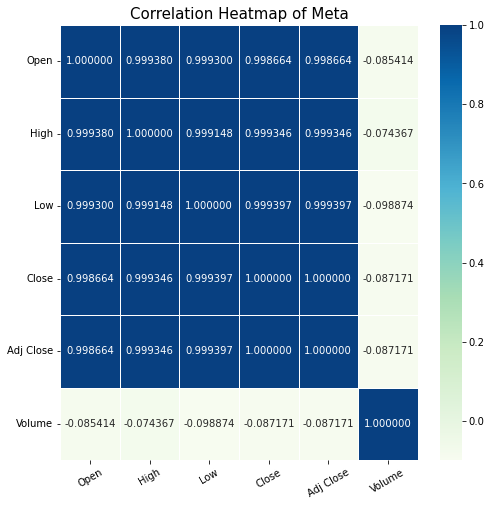

None 



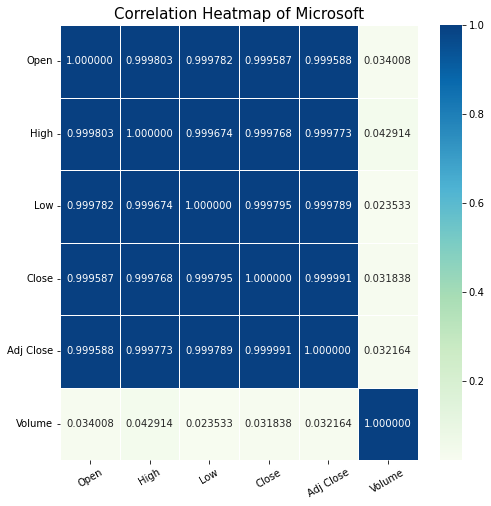

None 



In [7]:
def heatmap(stock, company):
    """
    Plot the correlation heatmap.

    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None.
    """

    plt.figure(figsize = (8,8))
    sns.heatmap(stock.corr(), cmap='GnBu', annot=True, linewidths = 1, fmt='f').set_title(f'Correlation Heatmap of {company}', fontsize=15)
    plt.xticks(rotation=30, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.show()
  
  
for company, stock in stock_list.items():
    print(heatmap(stock, company),'\n')

# Autocorrelation

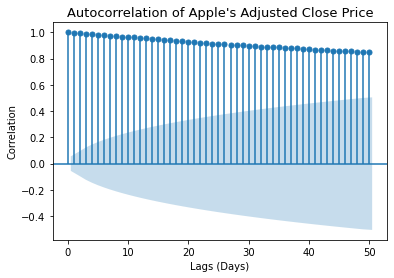

None 



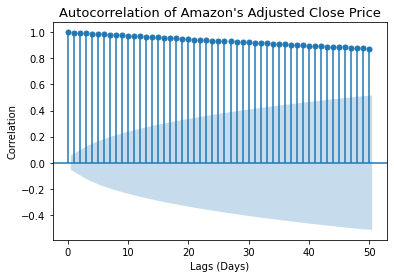

None 



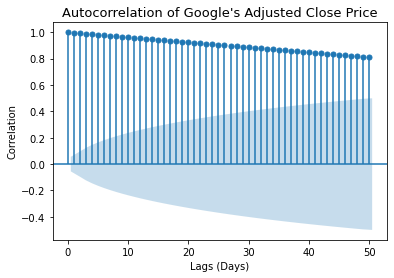

None 



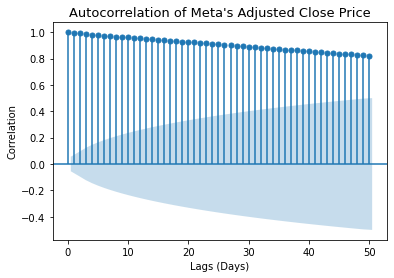

None 



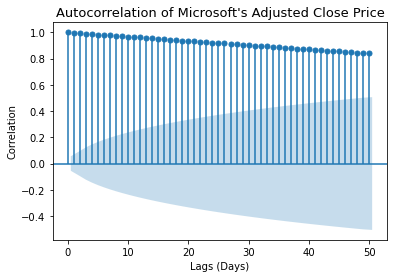

None 



In [8]:
def autocorrelation(stock, company):
    """
    Plot the autocorrelation of stocks based on adjusted close price.
 
    Parameters
    ----------
    stock: DataFrame
      Stock's DataFrame.
    company: str
      Company name.

    Returns
    -------
    None
    """

    tsaplots.plot_acf(stock["Adj Close"], lags=50)  
    plt.title(f'Autocorrelation of {company}\'s Adjusted Close Price', fontsize=13)
    plt.xlabel('Lags (Days)', fontsize=10)
    plt.ylabel('Correlation', fontsize=10)
    plt.show()


for company, stock in stock_list.items():
    print(autocorrelation(stock, company),'\n')